In [1]:
!pip install pandas scikit-learn joblib matplotlib


In [2]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("diabetes.csv")
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for col in cols:
    data[col] = data[col].replace(0, data[col].median())


In [5]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


NameError: name 'StandardScaler' is not defined

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [11]:
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200)

In [12]:
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy*100)


Model Accuracy: 75.97402597402598


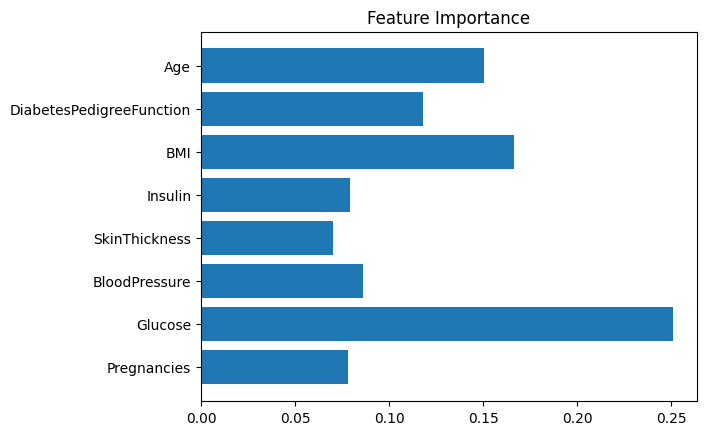

In [13]:
importance = model.feature_importances_
features = X.columns

plt.barh(features, importance)
plt.title("Feature Importance")
plt.show()


In [14]:
joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(accuracy, "accuracy.pkl")


['accuracy.pkl']

In [15]:
from google.colab import files
files.download("model.pkl")
files.download("scaler.pkl")
files.download("accuracy.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>